Capacidad de identificar patrones en enormes datasets de imagenes.

Se que es un ojo ya que identifico caracteristicos, desde lo mas basico a lo mas complejo

1. Entra una imagen
2. Aplica una serie de convoluciones
3. Genera un conjunto de mapas de caracteristicas

El output se convierte en un nuevo input

Detectando asi cambios de contrastes, texturas

Terminamos en un proceso similar a un embudo donde ya todos los patrones seran suficientes para ingresar en una red neuronal

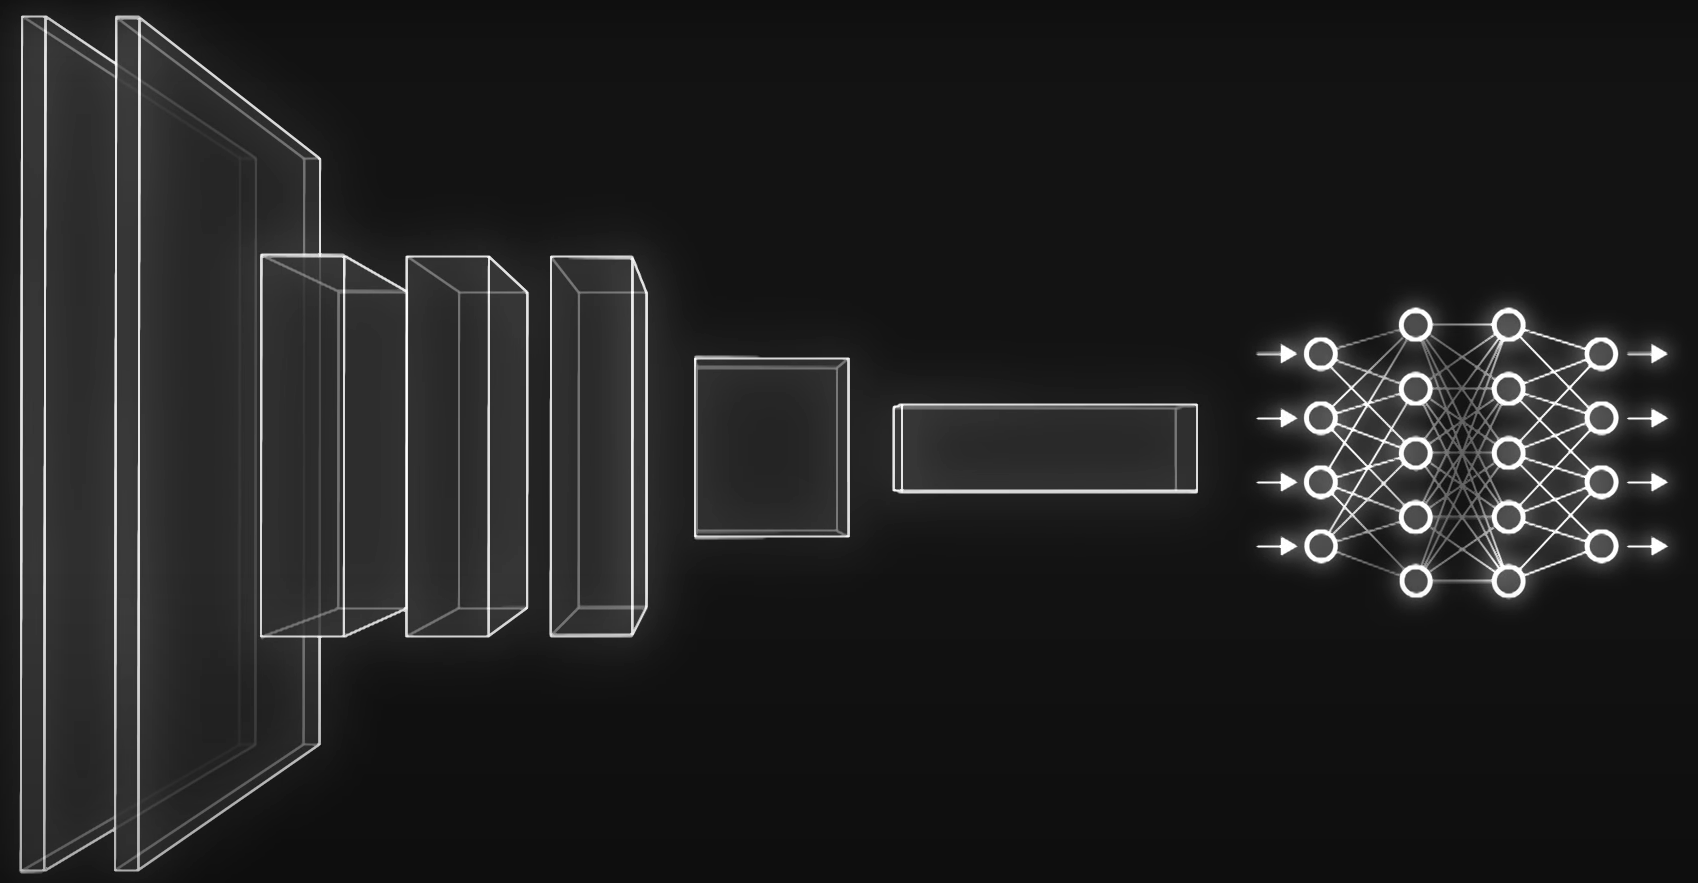

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


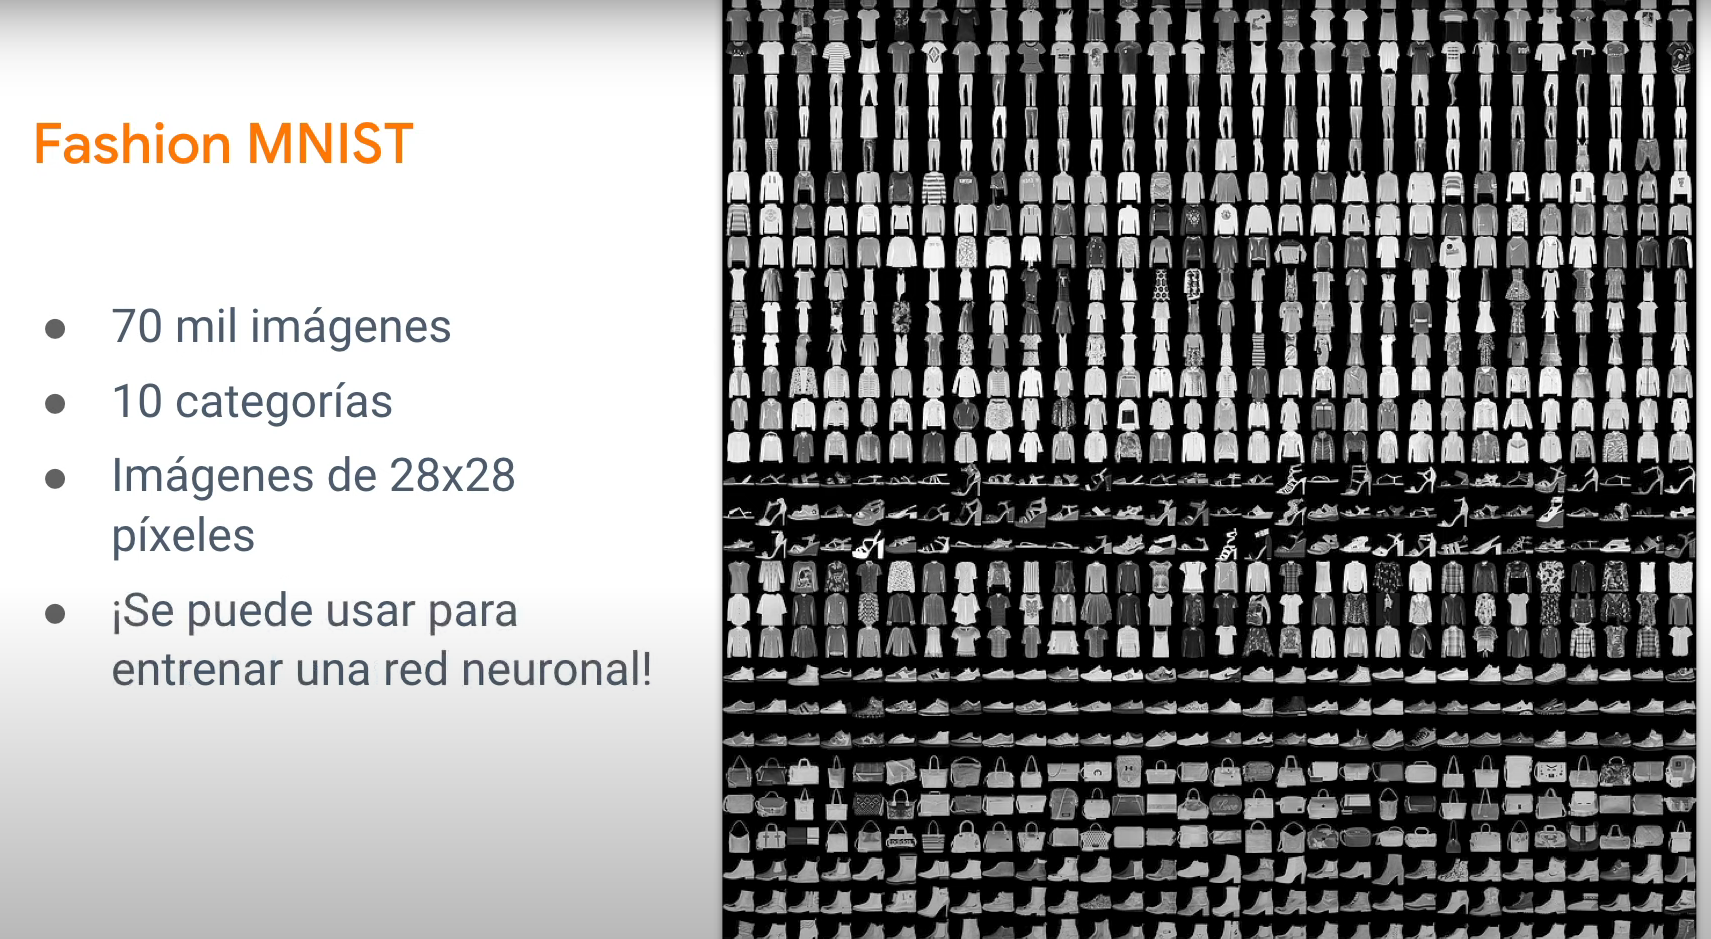

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
#60k imagenes divididas en 28 x 28
train_images.shape

(60000, 28, 28)

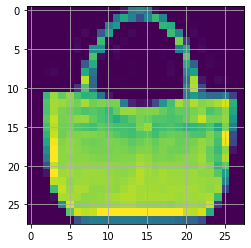

In [6]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)

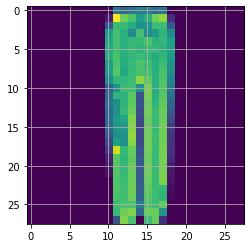

In [7]:
plt.figure()
plt.imshow(train_images[1000])
plt.grid(True)

In [8]:
train_images = train_images /255.0
test_images = test_images /255.0

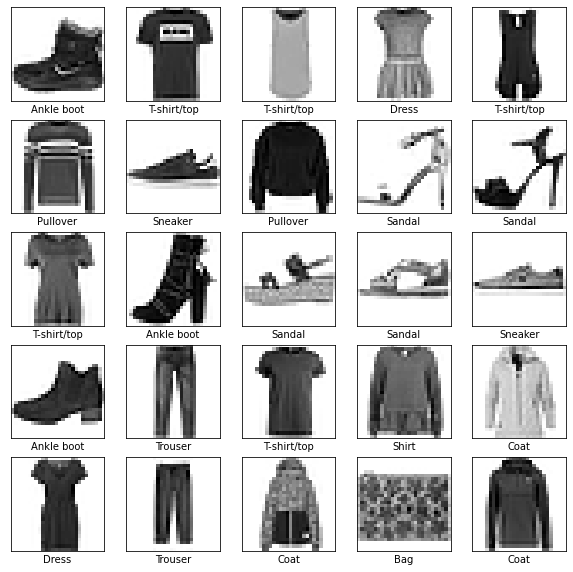

In [14]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid("on")
  #Tipo binario, nuestro tipo de informacion
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  #Etiqueta
  plt.xlabel(class_names[train_labels[i]])

# **Modelo**

Explicacion del funcionamiento de las capas que usamos.

La primera capa de esta red, tf.keras.layers.Flatten, transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles en la misma imagen y alineandolo. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

Despues de que los pixeles estan “aplanados”, la secuencia consiste de dos capastf.keras.layers.Dense. Estas estan densamente conectadas, o completamente conectadas. La primera capa Dense tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos softmax que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

La funcion de activacion Relu, hace que cuando se le mete un valor menor a 0, devuelve 0 y cuando se le mete un valor mayor a 0, actua como una funcion lineal normal.

La funcion de activacion Softmax transforma los numeros reales, en una distribucion de probabilidad,por ejemplo, 0.3 T-Shirt, 0.5 Sandal y 0.9 Goat, ya que goat es la que tiene mayor probabilidad es la que va a quedar y pone a esa mayor en 1 y al resto en 0 dentro del array

In [15]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)), 
                          keras.layers.Dense(128, activation = tf.nn.relu), 
                          keras.layers.Dense(10, activation=tf.nn.softmax)])

1. “Loss function —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
2. Optimizer — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
3. Metrics — Se usan para monitorear los pasos de entrenamiento y de pruebas. El siguiente ejemplo usa accuracy (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.”(TensorFlow)

In [17]:
#Compilamos el modelo

model.compile(optimizer = tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4960 - accuracy: 0.8262
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3726 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3384 - accuracy: 0.8750
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3149 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2961 - accuracy: 0.8902


Si tengo otro conjunto de datos de ese tipo de ropa tendra la capacidad del 87% de hacerlo bien

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("accuracy", test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3520 - accuracy: 0.8721
accuracy 0.8720999956130981


In [20]:
predictions = model.predict(test_images)